<a href="https://colab.research.google.com/github/shakeeluetp1041/Machine-Learning/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch: 0| Train Loss: 0.611232340335846 | Test Loss: 1.650330901145935
Epoch: 10| Train Loss: 0.5655508041381836 | Test Loss: 1.5615402460098267
Epoch: 20| Train Loss: 0.5279402732849121 | Test Loss: 1.480844259262085
Epoch: 30| Train Loss: 0.49766817688941956 | Test Loss: 1.407823085784912
Epoch: 40| Train Loss: 0.4727417528629303 | Test Loss: 1.341414451599121
Epoch: 50| Train Loss: 0.45242324471473694 | Test Loss: 1.2817248106002808
Epoch: 60| Train Loss: 0.4356309473514557 | Test Loss: 1.2276118993759155
Epoch: 70| Train Loss: 0.4216092526912689 | Test Loss: 1.178513526916504
Epoch: 80| Train Loss: 0.41031938791275024 | Test Loss: 1.134484052658081
Epoch: 90| Train Loss: 0.4008748531341553 | Test Loss: 1.0955934524536133
Epoch: 100| Train Loss: 0.39223986864089966 | Test Loss: 1.0586384534835815
Epoch: 110| Train Loss: 0.38562291860580444 | Test Loss: 1.0275449752807617
Epoch: 120| Train Loss: 0.37900596857070923 | Test Loss: 0.9964515566825867
Epoch: 130| Train Loss: 0.37388244271

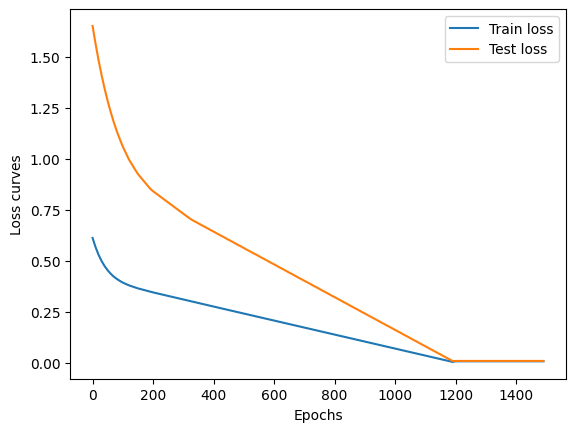

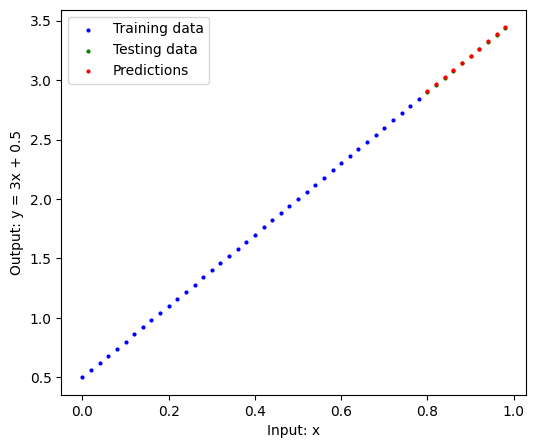

In [ ]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from torch import nn
import os
RANDOM_SEED=42
torch.manual_seed(RANDOM_SEED)
torch.cuda.is_available()
if torch.cuda.is_available():
  device='cuda'
else:
  device='cpu'
w=3
b=0.5
X=torch.arange(0,1,0.02).unsqueeze(dim=1)
y=w*X+b
train_lenght=int(0.8*len(X))
X_train,y_train=X[:train_lenght].to(device),y[:train_lenght].to(device)
X_test,y_test=X[train_lenght:].to(device),y[train_lenght:].to(device)
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer=nn.Linear(in_features=1,out_features=1)
  def forward(self,x):
    return self.linear_layer(x)

# class LinearRegressionModel(nn.Module):
#   def __init__(self):
#     super().__init__()
#     self.weight=nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float32))
#     self.bias=nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float32))
#   def forward(self,x:torch.tensor):
#       return self.weight*x+self.bias

model=LinearRegressionModel().to(device)
loss_fn=nn.L1Loss()
optimizer=torch.optim.SGD(params=model.parameters(),lr=0.01)

epochs=1500
epoch_buff=[]
train_loss_buff=[]
test_loss_buff=[]
for epoch in range(epochs):
  model.train()
  y_preds=model(X_train)
  loss=loss_fn(y_preds,y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  model.eval()
  with torch.inference_mode():
    y_test_preds=model(X_test)
    test_loss=loss_fn(y_test_preds,y_test)
    # epoch_buff.append(epoch)
    # train_loss_buff.append(loss.numpy())
    # test_loss_buff.append(test_loss.numpy())
  if epoch % 10 ==0:
    epoch_buff.append(epoch)
    train_loss_buff.append(loss.detach().cpu().numpy())
    test_loss_buff.append(test_loss.detach().cpu().numpy())
    print(f"Epoch: {epoch}| Train Loss: {loss} | Test Loss: {test_loss}")
plt.plot (epoch_buff,train_loss_buff,label='Train loss')
plt.plot (epoch_buff,test_loss_buff,label='Test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss curves')
plt.legend()

def plot_predictions(train_data,train_label,test_data,test_label,predictions=None):
  plt.figure(figsize=(6,5))
  plt.scatter(train_data,train_label,s=4,c='b',label='Training data')
  plt.scatter(test_data,test_label,c='g',s=4,label='Testing data')
  plt.xlabel('Input: x')
  plt.ylabel(f'Output: y = {w}x + {b}')
  if predictions is not None:
      plt.scatter(test_data,predictions,c='r',s=4,label='Predictions')
  plt.legend()
plot_predictions(train_data=X_train.cpu(),train_label=y_train.cpu(),test_data=X_test.cpu(),test_label=y_test.cpu(),predictions=y_test_preds.cpu())
# Define the directory name
directory = "models"


# Save Model
#  Create the directory if it doesn't already exist
if not os.path.exists(directory):
    os.makedirs(directory)
    print(f"Directory '{directory}' created.")
else:
    print(f"Directory '{directory}' already exists.")
model_path = os.path.join(directory, "my_model.pth")
torch.save(model.state_dict(), model_path)
print(f"Model saved to {model_path}")


# Load model in model_1
# model_1 = LinearRegressionModel()
# # Specify the path to your saved model weights
# model_path = "/content/models/my_model.pth"

# # Load the state dictionary into the model
# model_1.load_state_dict(torch.load(model_path))
